In [1]:
# Import Dependiences
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import Data file
df = pd.read_csv('creditcard.csv')

FIRST WE DEALING WITH UNBALANCED DATA

In [3]:
# Show First 5 rows of data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Show Last 5 rows of data
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Checking missing values in each coloumn
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Distribution of legit transaction and fraudulent transaction
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# Compare the average values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


/Users/lakshkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


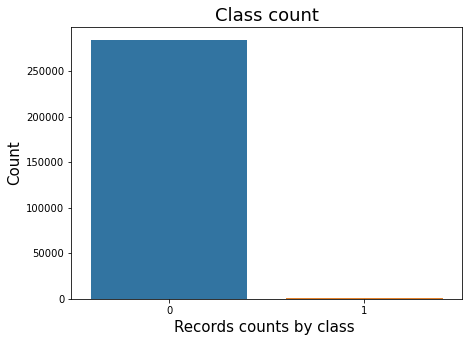

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class count" ,fontsize = 18)
plt.xlabel("Records counts by class ",fontsize = 15)
plt.ylabel("Count",fontsize = 15)
plt.show()

In [10]:
# Checkiing The Coorelation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


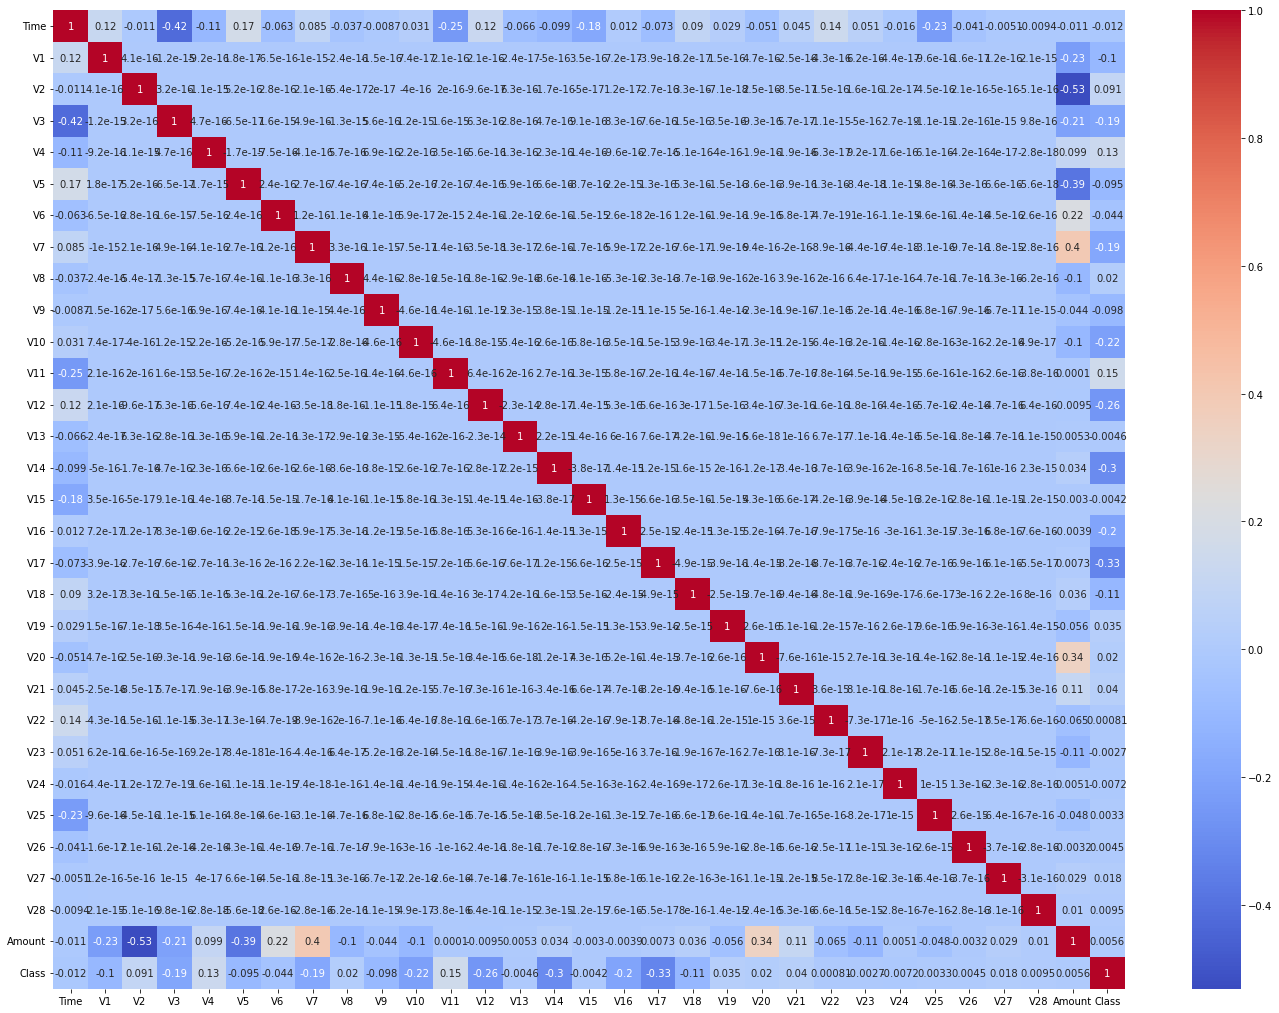

In [11]:
#Checking Coorelation on heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap="coolwarm",annot = True)
plt.show()

Splitting the data Into train & test data

In [12]:
Y = df['Class']
X = df.drop(['Class'] , axis = 1)

In [13]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [15]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [16]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, random_state=45,test_size=0.20)

In [17]:
# Checking the split of data in train and test
print(np.sum(Y))
print(np.sum(Y_train))
print(np.sum(Y_test))

492
377
115


In [18]:
X.shape , X_train.shape,X_test.shape

((284807, 30), (227845, 30), (56962, 30))

Using Logistic Regression model

In [19]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [20]:
acc = accuracy_score(Y_test,Y_pred)
print("The Accuracy score is {}".format(acc))

prec = precision_score(Y_test,Y_pred)
print("The Precision score is {}".format(prec))

rec = recall_score(Y_test,Y_pred)
print("The Recall score is {}".format(rec))

The Accuracy score is 0.9991222218320986
The Precision score is 0.9012345679012346
The Recall score is 0.6347826086956522


Now Using Random Forest classifier

In [21]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)

In [22]:
n_outliers = len(fraud)
n_errors = (Y_pred != Y_test).sum()

acc = accuracy_score(Y_test,Y_pred)
print("The Accuracy score is {}".format(acc))

prec = precision_score(Y_test,Y_pred)
print("The Precision score is {}".format(prec))

rec = recall_score(Y_test,Y_pred)
print("The Recall score is {}".format(rec))

The Accuracy score is 0.9996137776061234
The Precision score is 0.9696969696969697
The Recall score is 0.8347826086956521


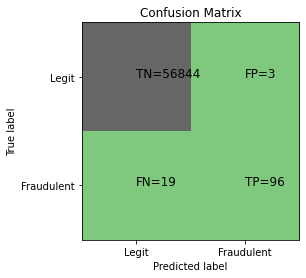

In [23]:
cm = confusion_matrix(Y_test,Y_pred)
plt.clf()
plt.imshow(cm,interpolation ='nearest', cmap = plt.cm.Accent)
categoryNames = ['Legit','Fraudulent']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
ticks = np.arange(len(categoryNames))
plt.xticks(ticks,categoryNames)
plt.yticks(ticks,categoryNames)
s = [['TN','FP'],['FN','TP']]
    
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+ "=" +str(cm[i][j]),fontsize = 12)
plt.show()

NOW WE DEALING WITH BALANCED DATA

In [24]:
legit_sample = legit.sample(n=492)

Concatenating dataframes

In [25]:
new_dataset = pd.concat([legit_sample , fraud],axis=0)

In [26]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8254,11063.0,1.302043,-0.261503,-0.722756,-0.853728,1.700463,3.426329,-1.013726,0.793970,1.596136,...,-0.119160,-0.231570,-0.051550,1.022013,0.368303,1.046159,-0.086748,-0.000809,15.95,0
213501,139281.0,2.264106,-1.452507,-1.036671,-1.661518,-1.190580,-0.410659,-1.227081,-0.000948,-1.314400,...,-0.135398,0.002884,0.273002,0.710771,-0.227795,-0.212388,-0.008254,-0.056861,15.00,0
157624,110160.0,-0.819989,0.980446,2.083004,-0.403272,0.172924,0.293818,0.381683,-0.052677,1.692573,...,-0.309027,-0.474892,-0.328394,-0.602733,0.277456,-0.721722,-0.111305,-0.110097,7.30,0
165018,117146.0,0.089560,0.946875,-0.438910,-0.537542,0.948394,-0.735933,0.984327,-0.083440,-0.046295,...,-0.326466,-0.822483,0.140446,0.496919,-0.424633,0.119003,0.218829,0.085248,17.99,0
129789,79214.0,-2.215132,0.304942,1.659242,-0.564950,-0.468577,-0.904371,-0.709207,0.959397,0.206782,...,0.093304,-0.056577,-0.349862,0.440798,-0.013125,-0.013399,-0.213845,-0.221266,3.89,0


In [27]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [28]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98244.115854,0.110580,-0.031932,-0.063224,-0.067932,0.069751,0.003489,0.022721,-0.033060,-0.033710,...,0.030062,-0.030937,0.096271,-0.027865,-0.021289,0.003598,0.001985,-0.000243,-0.012683,92.283008
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


/Users/lakshkumar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


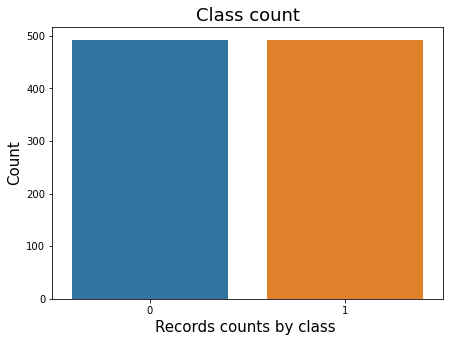

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(new_dataset['Class'])
plt.title("Class count" ,fontsize = 18)
plt.xlabel("Records counts by class ",fontsize = 15)
plt.ylabel("Count",fontsize = 15)
plt.show()

In [30]:
# Checkiing The Coorelation
corr = new_dataset.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.255565,-0.242987,0.171413,-0.249114,0.297846,0.108798,0.237768,-0.147417,0.189353,...,-0.063881,0.151763,0.040808,-0.015988,-0.187922,-0.096475,-0.140395,-0.017601,0.027213,-0.181941
V1,0.255565,1.000000,-0.816451,0.881941,-0.624937,0.861591,0.323522,0.889014,-0.081005,0.671251,...,0.017958,-0.025914,-0.042149,-0.073427,-0.069270,0.059017,0.188141,0.197423,-0.017013,-0.443556
V2,-0.242987,-0.816451,1.000000,-0.863222,0.689472,-0.804736,-0.277723,-0.845863,-0.023537,-0.708177,...,0.035650,-0.024968,0.163044,0.003274,0.123475,-0.009077,-0.166736,0.010016,-0.231067,0.496908
V3,0.171413,0.881941,-0.863222,1.000000,-0.773047,0.852706,0.444664,0.886628,-0.171555,0.765766,...,0.025725,-0.047057,-0.039525,-0.002403,-0.089701,-0.007735,0.106301,0.128816,-0.004935,-0.562639
V4,-0.249114,-0.624937,0.689472,-0.773047,1.000000,-0.579737,-0.422473,-0.713542,0.105434,-0.794865,...,-0.015844,0.075067,0.028041,-0.045768,-0.022152,0.131926,-0.011196,-0.057747,-0.006697,0.718248
V5,0.297846,0.861591,-0.804736,0.852706,-0.579737,1.000000,0.278481,0.838594,-0.206558,0.668944,...,0.039286,-0.080447,-0.098657,-0.140847,-0.086319,0.066132,0.189840,0.156052,-0.100472,-0.381355
V6,0.108798,0.323522,-0.277723,0.444664,-0.422473,0.278481,1.000000,0.278413,-0.548212,0.363959,...,0.010884,0.018218,0.328467,-0.031539,-0.103645,-0.012768,-0.163796,-0.039870,0.191516,-0.389314
V7,0.237768,0.889014,-0.845863,0.886628,-0.713542,0.838594,0.278413,1.000000,0.089917,0.761275,...,0.046451,-0.102687,-0.094352,-0.056584,0.056218,0.029502,0.233252,0.144981,0.130282,-0.476851
V8,-0.147417,-0.081005,-0.023537,-0.171555,0.105434,-0.206558,-0.548212,0.089917,1.000000,-0.074513,...,-0.090809,0.016550,-0.410262,0.068734,0.233240,0.053358,0.293025,-0.007036,0.026388,0.061722
V9,0.189353,0.671251,-0.708177,0.765766,-0.794865,0.668944,0.363959,0.761275,-0.074513,1.000000,...,0.154631,-0.226321,-0.070991,0.020792,-0.007797,-0.127972,0.134807,0.109878,0.023558,-0.553728


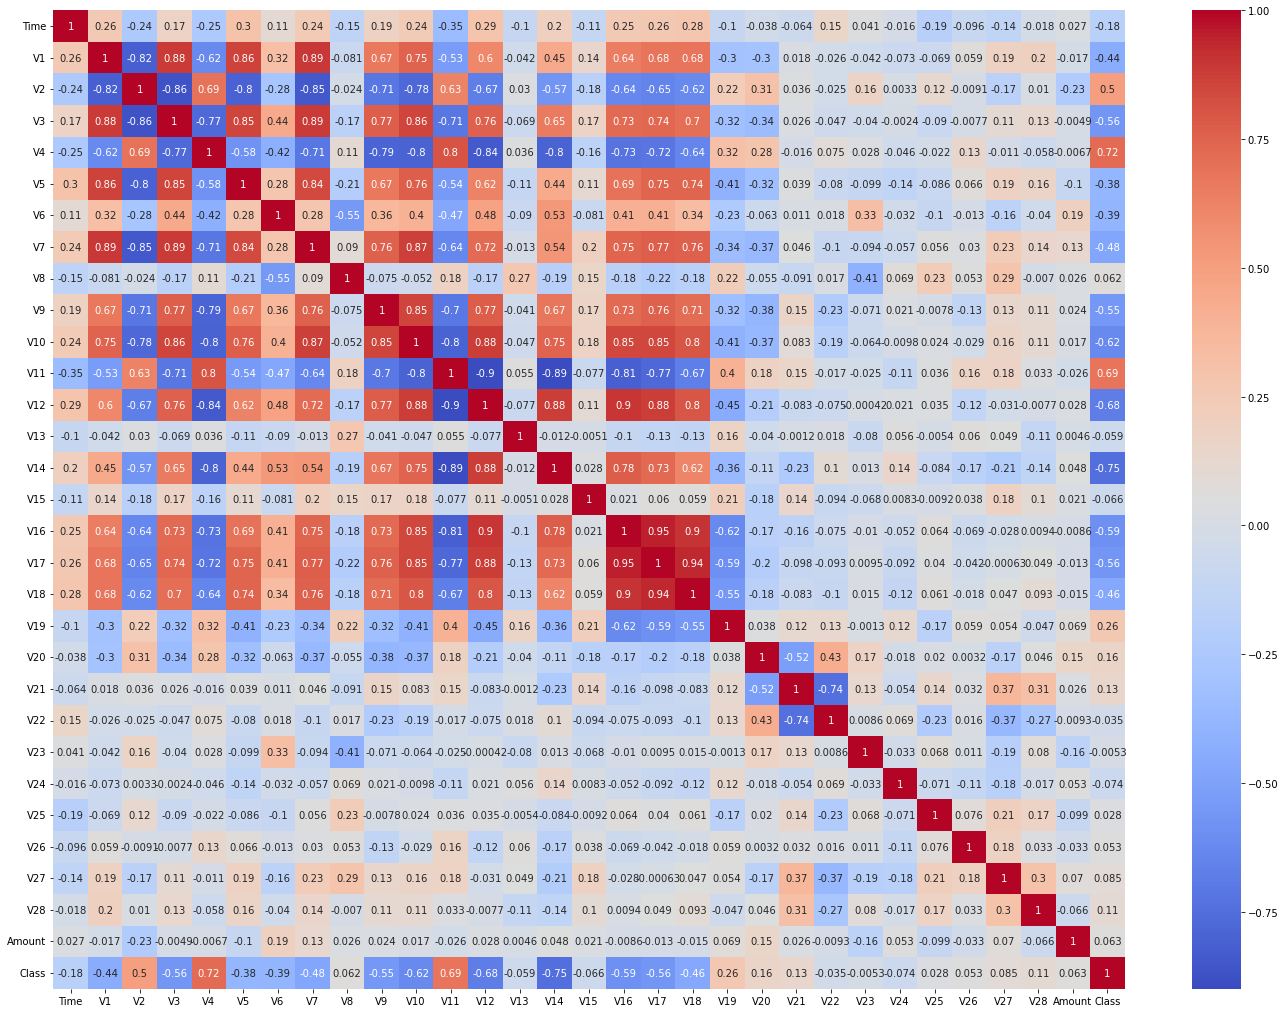

In [31]:
#Checking Coorelation on heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap="coolwarm",annot = True)
plt.show()

In [32]:
Y = new_dataset['Class']
X = new_dataset.drop(['Class'] , axis = 1)

In [33]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [34]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, random_state=45,test_size=0.20)

In [35]:
# Checking the split of data in train and test
print(np.sum(Y))
print(np.sum(Y_train))
print(np.sum(Y_test))

492
393
99


Using Logistic Regression

In [36]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [37]:
acc = accuracy_score(Y_test,Y_pred)
print("The Accuracy score is {}".format(acc))

prec = precision_score(Y_test,Y_pred)
print("The Precision score is {}".format(prec))

rec = recall_score(Y_test,Y_pred)
print("The Recall score is {}".format(rec))

The Accuracy score is 0.9086294416243654
The Precision score is 0.9175257731958762
The Recall score is 0.898989898989899


Using Random Forest Classifier 

In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)

In [39]:
n_outliers = len(fraud)
n_errors = (Y_pred != Y_test).sum()

acc = accuracy_score(Y_test,Y_pred)
print("The Accuracy score is {}".format(acc))

prec = precision_score(Y_test,Y_pred)
print("The Precision score is {}".format(prec))

rec = recall_score(Y_test,Y_pred)
print("The Recall score is {}".format(rec))

The Accuracy score is 0.934010152284264
The Precision score is 0.967391304347826
The Recall score is 0.898989898989899


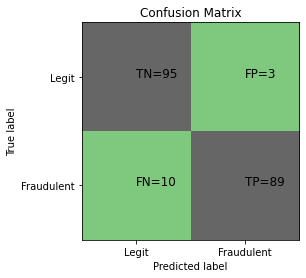

In [40]:
cm = confusion_matrix(Y_test,Y_pred)
plt.clf()
plt.imshow(cm,interpolation ='nearest', cmap = plt.cm.Accent)
categoryNames = ['Legit','Fraudulent']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
ticks = np.arange(len(categoryNames))
plt.xticks(ticks,categoryNames)
plt.yticks(ticks,categoryNames)
s = [['TN','FP'],['FN','TP']]
    
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+ "=" +str(cm[i][j]),fontsize = 12)
plt.show()